In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS = 10

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2149 files belonging to 3 classes.


2025-03-09 23:06:52.720633: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)
    # protibar 32 data nicche so total length hobe 32*68 = total data

68

(32, 256, 256, 3)


2025-03-09 23:06:56.750914: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


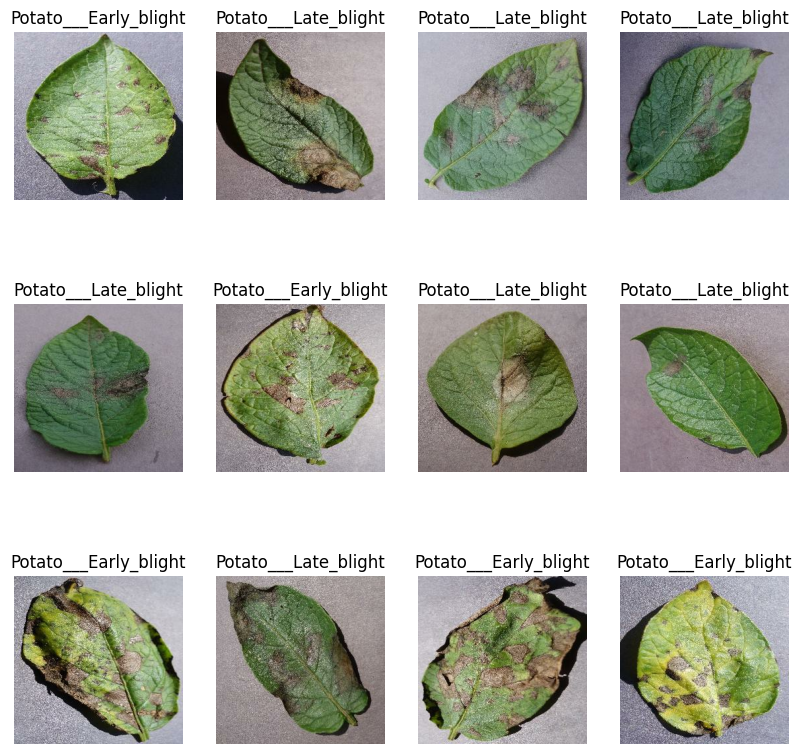

In [7]:

plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)

    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    
    #print(image_batch[0].shape)
   # print(label_batch.numpy())

In [8]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size    # 80% of 68*32

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

# training er jonno 80% data nilam and 68 length theke 54 legth training er jonno 

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

#remaining 20% data validation & test 

14

In [12]:
val_size = 0.1    # 10% 
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

# validation data   6*32= 

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

#test data 8*32

8

In [15]:
# this function take the tensor flow dataset

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size= 1000):

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int (val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.take(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)


54

In [18]:
len(val_ds)

6

In [19]:

len(test_ds)

48

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# cache read the image from the disk  keep the image in memory 
# shuffle the image
# prefetch if gpu is busy then prefetch will load the next petch from ur disk
#training will fast for that 

In [21]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # Adjust as needed

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

#augmentation suppose ekta image theke ami arou generate korte pari for test purpose

In [27]:
# data augmentation
# keras 
# tensor flow
# data preprocessing (image)
# image rescaling / resizing

In [23]:
# Defining the input shape (Batch size, Image size, Image size, Number of channels)
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  

# Defining the number of output classes (In this case, 3 classes)
n_classes = 3  

# Creating a Sequential model
model = models.Sequential([  
    resize_and_rescale,  # Resizes and rescales the image
    data_augmentation,   # Performs data augmentation to enhance generalization

    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),  # First convolutional layer (32 filters, 3x3 kernel, ReLU activation)
    layers.MaxPooling2D((2,2)),  # First max pooling layer (2x2 window size)

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),  # Second convolutional layer (64 filters, 3x3 kernel, ReLU activation)
    layers.MaxPooling2D((2,2)),  # Second max pooling layer

    layers.Conv2D(64, (3,3), activation='relu'),  # Third convolutional layer (64 filters, 3x3 kernel, ReLU activation)
    layers.MaxPooling2D((2,2)),  # Third max pooling layer

    layers.Conv2D(64, (3,3), activation='relu'),  # Fourth convolutional layer (64 filters, 3x3 kernel, ReLU activation)
    layers.MaxPooling2D((2,2)),  # Fourth max pooling layer

    layers.Conv2D(64, (3,3), activation='relu'),  # Fifth convolutional layer (64 filters, 3x3 kernel, ReLU activation)
    layers.MaxPooling2D((2,2)),  # Fifth max pooling layer

    layers.Conv2D(64, (3,3), activation='relu'),  # Sixth convolutional layer (64 filters, 3x3 kernel, ReLU activation)
    layers.MaxPooling2D((2,2)),  # Sixth max pooling layer

    layers.Flatten(),  # Flattens the feature map into a one-dimensional array

    layers.Dense(64, activation='relu'),  # Fully connected layer with 64 neurons and ReLU activation
    layers.Dense(n_classes, activation='softmax')  # Output layer with `n_classes` neurons and softmax activation
])

# Building the model according to the specified input shape
model.build(input_shape=input_shape)  


/home/ridwan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()   # Displays the model architecture, including layer types, output shapes, and the number of parameters.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 222, 222, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 111, 111, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 109, 109, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 54, 54, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 52, 52, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 26, 26, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 24, 24, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 12, 12, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 10, 10, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 5, 5, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 3, 3, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 1, 1, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(  
    optimizer='adam',  # Using the Adam optimizer for efficient training  
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Sparse categorical cross-entropy loss for multi-class classification  
    metrics=['accuracy']  # Tracking accuracy as the evaluation metric  
)  


In [26]:
history = model.fit(  
    train_ds,  # Training dataset  
    epochs=3,  # Number of epochs to train the model  
    batch_size=BATCH_SIZE,  # Batch size for training  
    verbose=1,  # Display training progress  
    validation_data=val_ds  # Validation dataset to evaluate performance after each epoch  
)  


Epoch 1/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4723 - loss: 0.9302  

2025-03-09 23:09:13.689856: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


54/54 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.4724 - loss: 0.9299 - val_accuracy: 0.4948 - val_loss: 0.8754
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5122 - loss: 0.8729 - val_accuracy: 0.7500 - val_loss: 0.7641
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7257 - loss: 0.6711 - val_accuracy: 0.7969 - val_loss: 0.5367


In [27]:
scores = model.evaluate(test_ds)  # Evaluates the model on the test dataset and returns the loss and accuracy.


48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 388ms/step - accuracy: 0.7835 - loss: 0.4944


In [28]:
scores


[0.49221521615982056, 0.7992047667503357]

In [29]:
history.history['accuracy']


[0.47685185074806213, 0.5486111044883728, 0.7482638955116272]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 3, 'steps': 54}

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

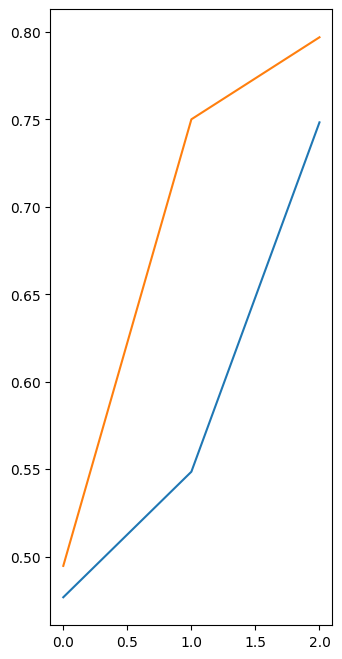

In [57]:
# Assuming history.history contains 'accuracy' and 'val_accuracy' for each epoch
# Extract the training accuracy values from the history object
acc = history.history['accuracy']

# Extract the validation accuracy values from the history object
val_acc = history.history['val_accuracy']

# Get the number of epochs (assuming both 'accuracy' and 'val_accuracy' have the same length)
EPOCHS = len(acc)

# Create a new figure for plotting with a specific size (8x8 inches)
plt.figure(figsize=(8,8))

# Create a subplot with 1 row and 2 columns, and select the first subplot
plt.subplot(1, 2, 1)

# Plot the training accuracy over epochs, using the 'acc' array for y-values and 'range(EPOCHS)' for x-values
plt.plot(range(EPOCHS), acc, label='Training Accuracy')

# Plot the validation accuracy over epochs, using the 'val_acc' array for y-values and 'range(EPOCHS)' for x-values
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')

# Add a legend to the plot to label the lines, positioning it in the lower right corner
#plt.legend(loc='lower right')


First image prediction
First label: Potato___Late_blight


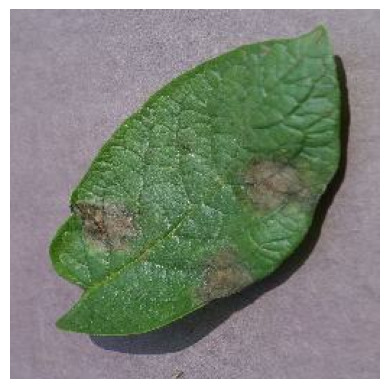

In [55]:
# Loop through one batch from the test dataset
for images_batch, labels_batch in test_ds.take(1):
    
    # Get the first image from the batch and convert it to a NumPy array of type uint8 (for display)
    first_image = images_batch[0].numpy().astype('uint8')
    
    # Get the first label from the batch, which corresponds to the class index
    first_label = labels_batch[0].numpy()
    
    # Print a message indicating we are about to show the image
    print("First image prediction")
    
    # Display the first image using Matplotlib's imshow function
    plt.imshow(first_image)
    
    print("First label:", class_names[first_label])
    
    
    # Optional: Hide axes for a cleaner image display
    plt.axis('off')  
    
    # Show the image
    plt.show()
    
    
